In [1]:
import threading
import time
import random

#Worker counts to test
worker_counts = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

#Function to simulate worker task
def worker_task():
    time.sleep(random.uniform(0.5, 2))

#Function to run test with threading.Thread
def run_with_threading(num_workers):
    threads = []
    start_time = time.time()

    for _ in range(num_workers):
        t = threading.Thread(target=worker_task)
        t.start()
        threads.append(t)

    for t in threads:
        t.join()

    end_time = time.time()
    print(f"[threading.Thread] Workers: {num_workers} | Time: {end_time - start_time:.2f} seconds")

#Run the test for different worker counts
if __name__ == "__main__":
    for count in worker_counts:
        run_with_threading(count)


[threading.Thread] Workers: 100 | Time: 2.02 seconds
[threading.Thread] Workers: 500 | Time: 2.07 seconds
[threading.Thread] Workers: 1000 | Time: 2.15 seconds
[threading.Thread] Workers: 2000 | Time: 2.40 seconds
[threading.Thread] Workers: 3000 | Time: 2.69 seconds
[threading.Thread] Workers: 4000 | Time: 2.89 seconds
[threading.Thread] Workers: 5000 | Time: 3.36 seconds
[threading.Thread] Workers: 6000 | Time: 3.71 seconds
[threading.Thread] Workers: 7000 | Time: 4.07 seconds
[threading.Thread] Workers: 8000 | Time: 4.68 seconds
[threading.Thread] Workers: 9000 | Time: 4.80 seconds
[threading.Thread] Workers: 10000 | Time: 5.19 seconds


In [2]:
import time
import random
from concurrent.futures import ThreadPoolExecutor, as_completed

#List of worker counts
worker_counts = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

#Task function
def worker_task():
    time.sleep(random.uniform(0.5, 2))

#Run test for each worker count
def run_threadpool_tests():
    for num_workers in worker_counts:
        max_workers = max(1, num_workers // 2)

        start_time = time.time()

        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            futures = [executor.submit(worker_task) for _ in range(num_workers)]
            for future in as_completed(futures):
                pass

        end_time = time.time()
        duration = end_time - start_time

        print(f"[ThreadPoolExecutor] Workers: {num_workers} | max_workers: {max_workers} | Time: {duration:.2f} seconds")

#Run the tests
if __name__ == "__main__":
    run_threadpool_tests()


[ThreadPoolExecutor] Workers: 100 | max_workers: 50 | Time: 3.73 seconds
[ThreadPoolExecutor] Workers: 500 | max_workers: 250 | Time: 3.73 seconds
[ThreadPoolExecutor] Workers: 1000 | max_workers: 500 | Time: 3.81 seconds
[ThreadPoolExecutor] Workers: 2000 | max_workers: 1000 | Time: 3.87 seconds
[ThreadPoolExecutor] Workers: 3000 | max_workers: 1500 | Time: 3.97 seconds
[ThreadPoolExecutor] Workers: 4000 | max_workers: 2000 | Time: 4.11 seconds
[ThreadPoolExecutor] Workers: 5000 | max_workers: 2500 | Time: 4.24 seconds
[ThreadPoolExecutor] Workers: 6000 | max_workers: 3000 | Time: 4.39 seconds
[ThreadPoolExecutor] Workers: 7000 | max_workers: 3500 | Time: 4.77 seconds
[ThreadPoolExecutor] Workers: 8000 | max_workers: 4000 | Time: 4.61 seconds
[ThreadPoolExecutor] Workers: 9000 | max_workers: 4500 | Time: 4.75 seconds
[ThreadPoolExecutor] Workers: 10000 | max_workers: 5000 | Time: 4.82 seconds


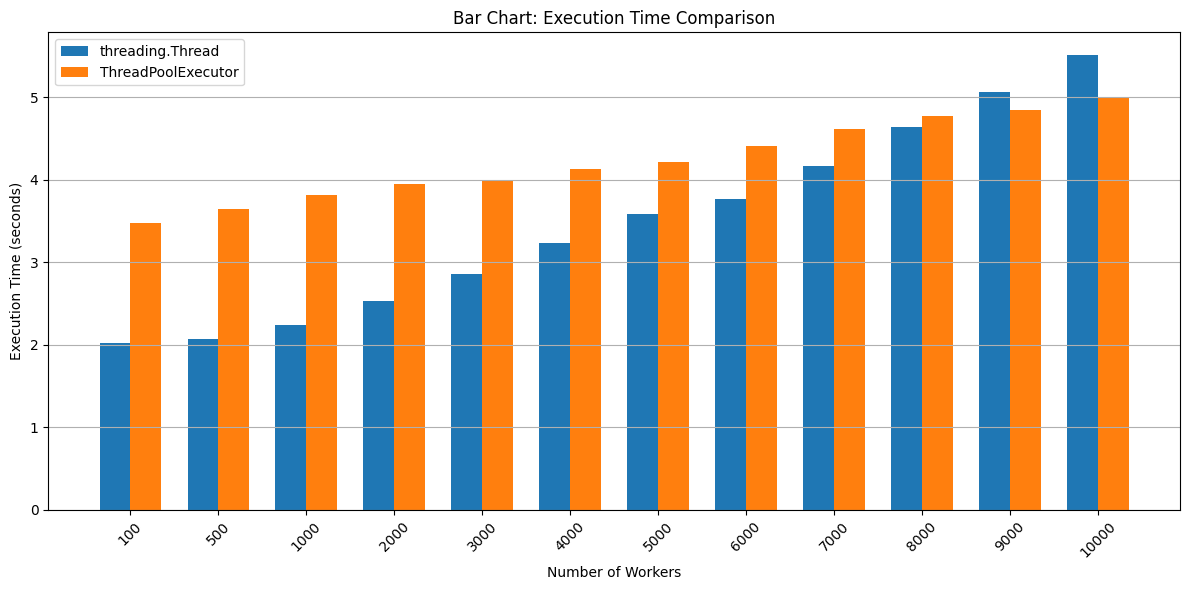

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#Data
worker_counts = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
threading_times = [2.02, 2.07, 2.24, 2.53, 2.86, 3.23, 3.59, 3.77, 4.16, 4.64, 5.06, 5.51]
threadpool_times = [3.47, 3.65, 3.81, 3.95, 3.98, 4.13, 4.22, 4.41, 4.61, 4.77, 4.84, 4.99]

#X-axis positions
x = np.arange(len(worker_counts))
width = 0.35  # width of the bars

#Plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, threading_times, width, label='threading.Thread')
plt.bar(x + width/2, threadpool_times, width, label='ThreadPoolExecutor')

#Labels and formatting
plt.xlabel("Number of Workers")
plt.ylabel("Execution Time (seconds)")
plt.title("Bar Chart: Execution Time Comparison")
plt.xticks(x, worker_counts, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

#Show the plot
plt.show()


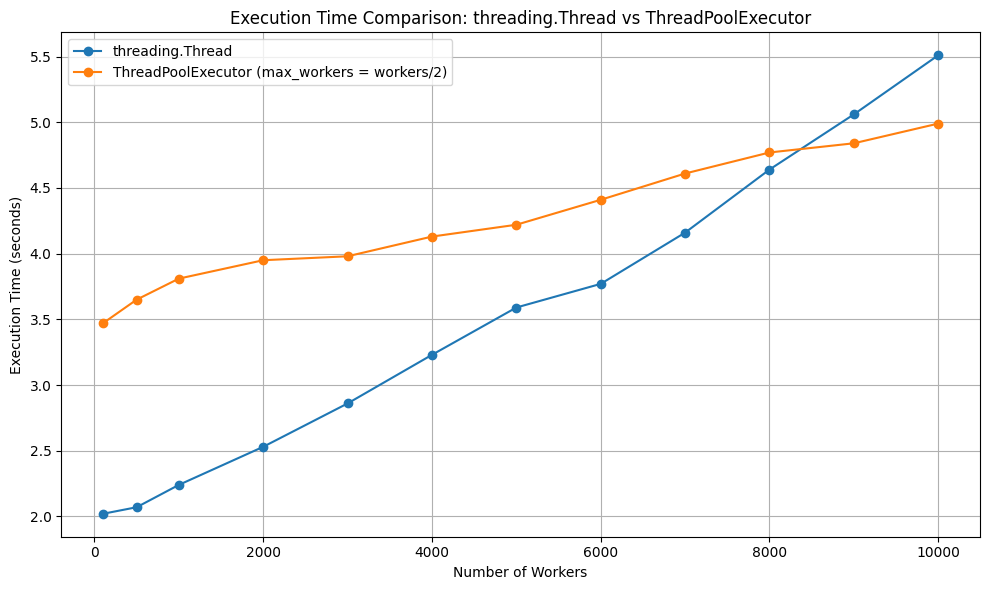

In [4]:
import matplotlib.pyplot as plt

#Worker counts (shared between both methods)
worker_counts = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

#Execution times from previous results
threading_times = [2.02, 2.07, 2.24, 2.53, 2.86, 3.23, 3.59, 3.77, 4.16, 4.64, 5.06, 5.51]
threadpool_times = [3.47, 3.65, 3.81, 3.95, 3.98, 4.13, 4.22, 4.41, 4.61, 4.77, 4.84, 4.99]

#Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(worker_counts, threading_times, marker='o', label='threading.Thread')
plt.plot(worker_counts, threadpool_times, marker='o', label='ThreadPoolExecutor (max_workers = workers/2)')
plt.xlabel("Number of Workers")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison: threading.Thread vs ThreadPoolExecutor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()